Objectif : comparer l'évolution de l'activité en fonction de l'âge entre les acteurs et les actrices. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Import DataFrames

In [2]:
title_principals_actors = pd.read_csv('/content/drive/MyDrive/Wild Code School - Data Analyst/Projet 2/Travail solo/title_principals_actors', index_col=[0])

In [3]:
name_basics_actors = pd.read_csv('/content/drive/MyDrive/Wild Code School - Data Analyst/Projet 2/Travail solo/name_basics_actor', index_col=[0])

In [4]:
title_basics_movies = pd.read_csv('/content/drive/MyDrive/Wild Code School - Data Analyst/Projet 2/Travail solo/title_basics_movies', index_col=[0])

### Merge DataFrames

In [5]:
actors_movies = pd.merge(title_basics_movies, title_principals_actors, how='inner', on='tconst')

In [6]:
actors_movies = pd.merge(actors_movies, name_basics_actors, how = 'left', on='nconst')

### Transformer les formats de dates

In [7]:
actors_movies['startYear'] = pd.to_datetime(actors_movies['startYear'], format = '%Y')

In [8]:
actors_movies['birthYear'][actors_movies['nconst']=='nm8810146']=1951.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
actors_movies['birthYear'][actors_movies['nconst']=='nm1620433']=1956.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
actors_movies['birthYear'] = pd.to_datetime(actors_movies['birthYear'], format = '%Y')

In [11]:
actors_movies['deathYear'] = pd.to_datetime(actors_movies['deathYear'], format = '%Y')

### Supprimer les lignes sans nom/année de naissance créées par la jointure

In [12]:
actors_movies = actors_movies[actors_movies['birthYear'].notna()] 

### Calculer l'âge lors de l'année de sortie du film

In [13]:
actors_movies['age'] = (actors_movies['startYear'] - actors_movies['birthYear'])/ np.timedelta64(1, 'Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
actors_movies['age'] = actors_movies['age'].dropna().astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
actors_movies = actors_movies[(actors_movies['age']>0) & (actors_movies['age']<101)] 

### Identifier les erreurs de catégorisation actor/actress

In [ ]:
actors_movies[actors_movies['category'] != actors_movies['primaryProfession']]

In [16]:
# Chris Pratt

actors_movies['category'][actors_movies['nconst']=='nm0695435'] = 'actor'
actors_movies['primaryProfession'][actors_movies['nconst']=='nm0695435'] = 'actor'

In [17]:
actors_movies.drop(['primaryProfession'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


### Explorations

[Text(0, 0, '0'),
 Text(0, 0, '10'),
 Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '60'),
 Text(0, 0, '70'),
 Text(0, 0, '80'),
 Text(0, 0, '90'),
 Text(0, 0, '100')]

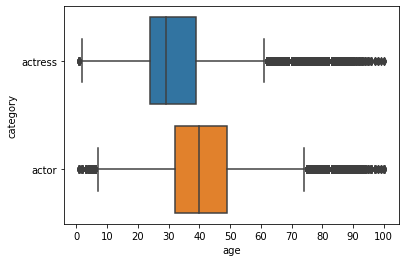

In [53]:
ax1 = sns.boxplot(data = actors_movies,
            x = 'age',
            y = 'category')

ax1.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax1.set_xticklabels([0,10,20,30,40,50,60,70,80,90,100])

[Text(0, 0, '0'),
 Text(0, 0, '10'),
 Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '60'),
 Text(0, 0, '70'),
 Text(0, 0, '80'),
 Text(0, 0, '90')]

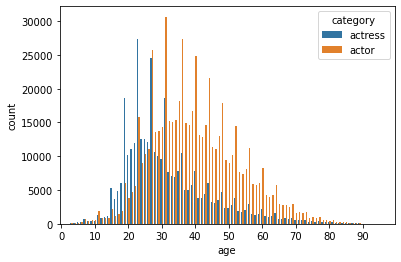

In [54]:
ax2 = sns.countplot(data = actors_movies,
            x = 'age',
            hue = 'category')

ax2.set_xticks([0,10,20,30,40,50,60,70,80,90])
ax2.set_xticklabels([0,10,20,30,40,50,60,70,80,90])

In [37]:
actors_movies['age'][actors_movies['category']=='actress'].mean()

32.86758347260752

In [40]:
actors_movies['age'][actors_movies['category']=='actor'].mean()

41.13571650001319